<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/Actividad%20Semanal%20--%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Actividad Semanal -- 4**
>## **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)**
>## **Tecnológico de Monterrey**
>## **Prof: Jobish Vallikavungal Devassia**




### **Gerardo Aaron Castañeda Jaramillo  -  Matrícula A01137646**
### **Genaro Ramos Higuera  -  Matrícula A00351269**
### **5 de octubre del 2022**

## **Parte 1: Ejercicio guiado**

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)
df.index.name = None

### Identificacion y Limpieza de datos

In [4]:
df_norm = df.copy()

#eliminamos valores mayores a 4 en X3 
X3_values = []
for i in range(0,len(df_norm.index)):
  if df_norm['X3'].iloc[i] > 4:
    if df_norm['X3'].iloc[i] not in X3_values:
      X3_values.append(int(df_norm['X3'].iloc[i]))
for i in X3_values:
  df_norm['X3'].replace(i,4,inplace=True)

#sustituimos valores de x3 de 0 por valor 4 de others
df_norm['X3'].replace(0,4,inplace=True)

#sustituimos valores de 0 en X4 por por 3, ya que entra dentro de el valor 3 = others
df_norm['X4'].replace(0,3,inplace=True)

#cambimos valores de -2 de X6 a X11 por -1
df_norm.iloc[:,5:11] = df_norm.iloc[:,5:11].replace(-2,-1)

#cambiamos valores negativos de X12 a X24
for col in df_norm.iloc[:,11:23].columns:
  df_norm[col] = df_norm[col].abs()

#eliminamos las filas con valores nulos, que representan 42/30000
df_norm.dropna(axis=0,inplace=True)

Cambiaremos los nombres de las columnas para su más fácil visualización

In [5]:
columns_name = ['BAL','SEX','EDUCATION','MARRIAGE','AGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1',
                'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Y']
df_norm.columns = columns_name
df_norm.columns

Index(['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'Y'],
      dtype='object')

In [6]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAL        29958 non-null  int64  
 1   SEX        29958 non-null  float64
 2   EDUCATION  29958 non-null  float64
 3   MARRIAGE   29958 non-null  float64
 4   AGE        29958 non-null  float64
 5   PAYSTAT_1  29958 non-null  float64
 6   PAYSTAT_2  29958 non-null  float64
 7   PAYSTAT_3  29958 non-null  float64
 8   PAYSTAT_4  29958 non-null  float64
 9   PAYSTAT_5  29958 non-null  float64
 10  PAYSTAT_6  29958 non-null  float64
 11  BILL_1     29958 non-null  float64
 12  BILL_2     29958 non-null  float64
 13  BILL_3     29958 non-null  float64
 14  BILL_4     29958 non-null  float64
 15  BILL_5     29958 non-null  float64
 16  BILL_6     29958 non-null  float64
 17  PAY_1      29958 non-null  float64
 18  PAY_2      29958 non-null  float64
 19  PAY_3      29958 non-null  float64
 20  PAY_4 

Analizamos la base de datos con formato

## **Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

Comenzamos separando los valores de entrada al modelo de los valores Y, y separando los valores que se usaran en el PCA ya que no aplica bien usarse con valores categóricos

In [7]:
dfw = df_norm.copy()

Y_values = dfw['Y']
x_values = dfw.drop('Y',axis=1)
x_pca = x_values.drop(['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6'],axis=1)
x_pca.columns

Index(['BAL', 'AGE', 'BILL_1', 'BILL_2', 'BILL_3', 'BILL_4', 'BILL_5',
       'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

###A continuación vemos el mapa de calor de la correlacion de todas las Variables

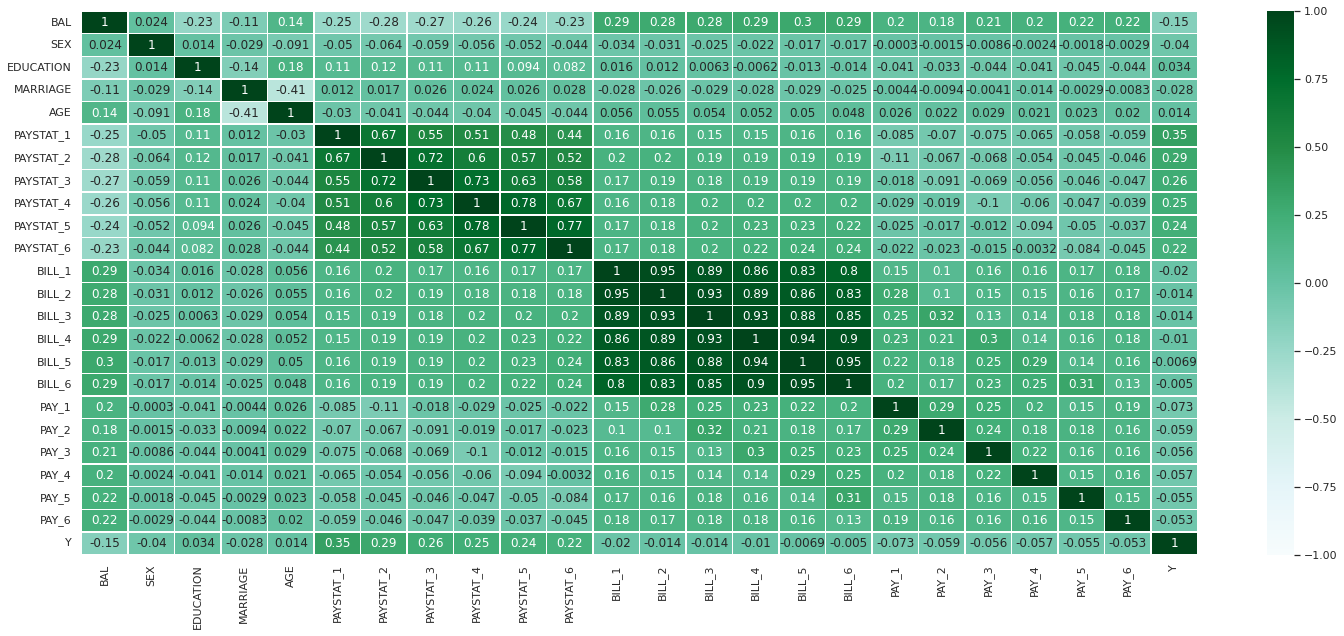

In [8]:
import seaborn as sns

corrs = dfw.corr()

sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

Primero utilizamos el método de preprocessing de "scale" para tener todas las columnas en una misma escala

In [9]:
prepross = preprocessing.scale(x_pca)

# Ahora veamos el mapa de calor con las variables numericas ya escaladas

In [10]:
prepross_df =pd.DataFrame(prepross)
prepross_df.columns =x_pca.columns

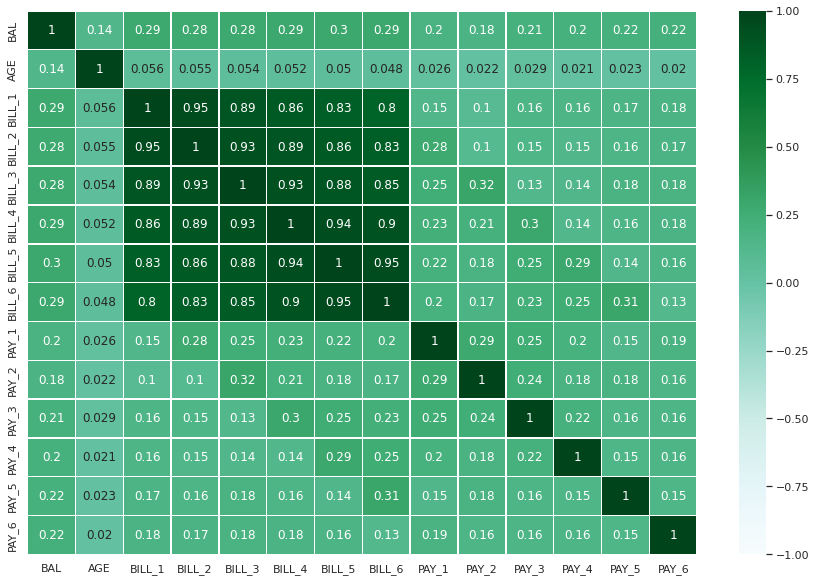

In [11]:
import seaborn as sns

corrs = prepross_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

Seguido evaluamos la proporción de la variancia de cada variable:

In [12]:
Varience = np.cov(prepross)
Varience

array([[ 0.09855445,  0.05873296,  0.02405292, ...,  0.05482134,
         0.13462329, -0.04466394],
       [ 0.05873296,  0.05996909,  0.01243276, ...,  0.02275172,
         0.04635209, -0.0728375 ],
       [ 0.02405292,  0.01243276,  0.02507056, ...,  0.04552031,
         0.04651452,  0.02445099],
       ...,
       [ 0.05482134,  0.02275172,  0.04552031, ...,  0.2175491 ,
         0.02598707,  0.06828943],
       [ 0.13462329,  0.04635209,  0.04651452, ...,  0.02598707,
         2.43806621,  0.04228367],
       [-0.04466394, -0.0728375 ,  0.02445099, ...,  0.06828943,
         0.04228367,  0.18447319]])

In [13]:
total = 0
for i in range(0,len(prepross[0])-1):
  total = total + Varience[i][i]
print('Total Varience \t\t\t:', total.round(2))
min_val = total
minv_str = ''
max_val = 0
maxv_str = ''
x_val = 0
for i in range(0,len(prepross[0])-1):
  x_val = ((Varience[i][i]/total)*100).round(2)
  str_val = str(x_pca.columns[i])
  if x_val > max_val:
    max_val = x_val
    maxv_str = x_pca.columns[i]
  elif x_val < min_val:
    min_val = x_val
    minv_str = x_pca.columns[i]
  print('Varience prop. of ' + str_val + ': ' + str(x_val) + '%' )

print('Min value is: ' + str(min_val) + '% in ' + minv_str)
print('Max value is: ' + str(max_val) + '% in ' + maxv_str)
print ("Len de prepross [0]",len(prepross[0]))


Total Varience 			: 11.14
Varience prop. of BAL: 0.88%
Varience prop. of AGE: 0.54%
Varience prop. of BILL_1: 0.22%
Varience prop. of BILL_2: 0.52%
Varience prop. of BILL_3: 6.54%
Varience prop. of BILL_4: 0.74%
Varience prop. of BILL_5: 72.24%
Varience prop. of BILL_6: 0.86%
Varience prop. of PAY_1: 0.33%
Varience prop. of PAY_2: 1.32%
Varience prop. of PAY_3: 0.61%
Varience prop. of PAY_4: 4.68%
Varience prop. of PAY_5: 10.53%
Min value is: 0.22% in BILL_1
Max value is: 72.24% in BILL_5
Len de prepross [0] 14


Donde podemos ver que, de las variables, la de mayor importancia es BILL_5 con un 72.24%, y la de menor importancia es BILL_1 con 0.22%

Y ahora utilizamos el método de PCA

In [14]:
pcs = PCA()
pcs.fit(prepross) 

PCA()

Presentamos la variación estándar, la proporción de la variancia, y la proporción cumulativa en base los componentes principales

In [15]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4350,1.3082,1.0222,0.9620,0.9383,0.9333,0.8820,0.8521,0.8413,0.5139,0.2680,0.2022,0.1605,0.1537
Proportion of variance,0.4235,0.1222,0.0746,0.0661,0.0629,0.0622,0.0556,0.0519,0.0506,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4235,0.5457,0.6204,0.6865,0.7494,0.8116,0.8671,0.9190,0.9696,0.9884,0.9936,0.9965,0.9983,1.0000


Evaluamos en base a la proporción cumulativa cuantos componentes principales son necesarios para llegar a una variabilidad arriba al 90%

In [16]:
pcsSummary_df.iloc[2,7].round(4)*100

91.9

In [17]:
(1 - pcsSummary_df.iloc[2,7]).round(4)*100

8.1

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

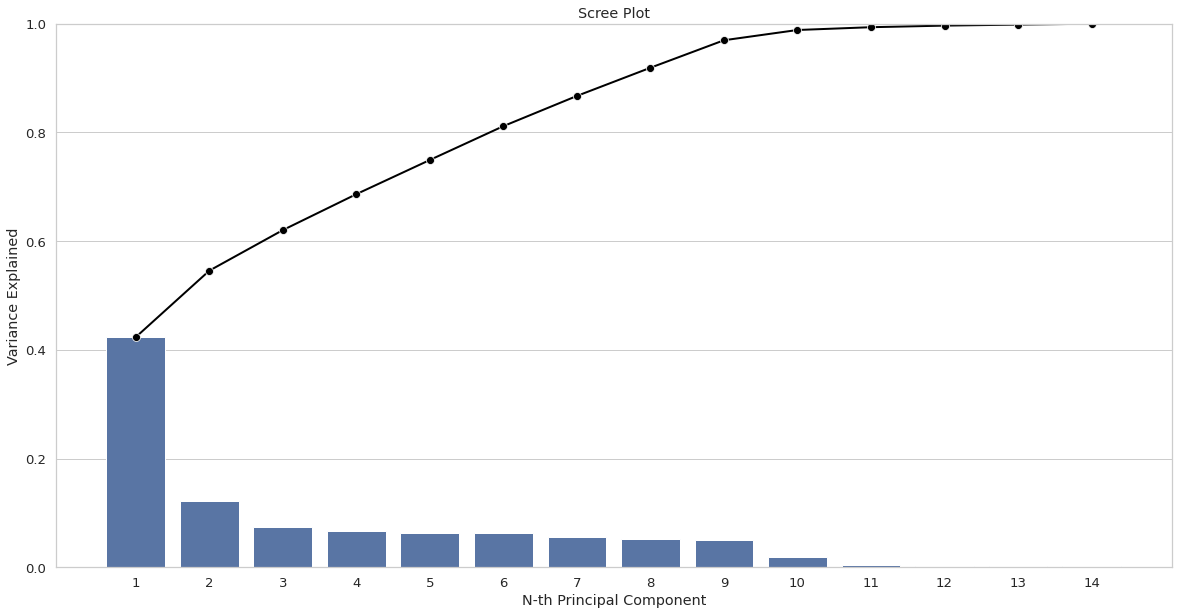

In [19]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

*   El primer componente principal abarca únicamente un 42% de la variabilidad
*   Es necesario abarcar hasta PC8 para llegar a un 91.9% de variabilidad
*   Reducir el número de variables a menos de 8 significaría una pérdida de variabilidad considerable
*   Existe una pérdida de variación del 8.1% incluyendo 8 componentes principales

### El numero **mínimo de componentes principales** para el modelo son **12**

## **Paso 2: Interprete cada componente principal en términos de las variables originales**

Comenzamos usando el método de .transpose() para acomodar los componentes principales en las columnas, contra los nombres de las columnas de la base de datos original. Para así poder visualizar el impacto de las variables originales sobre los componentes principales.

In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=x_pca.columns
                                )
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
BAL,0.165565,0.300538,-0.378209,-0.199249,-0.025290,-0.084130,0.111396,-0.060753
AGE,0.032799,0.071926,-0.870358,0.336170,0.028978,0.074672,-0.078368,0.033714
BILL_1,0.372395,-0.191181,-0.032392,-0.058608,-0.035930,-0.045563,0.006440,0.002512
BILL_2,0.382992,-0.175861,-0.001193,0.010543,-0.078185,-0.035791,-0.032184,-0.132825
BILL_3,0.388074,-0.127792,0.034773,0.063238,-0.123864,0.084363,-0.115457,0.093353
BILL_4,0.391472,-0.120484,0.033747,0.073973,-0.021841,0.007817,0.122453,0.040436
BILL_5,0.388217,-0.107094,0.033053,0.036804,0.120742,-0.080628,-0.007429,0.049898
BILL_6,0.380670,-0.092900,0.016839,-0.077661,0.143763,0.083384,0.008679,0.004406
PAY_1,0.135517,0.382542,0.172912,0.363005,-0.232924,0.009000,-0.203041,-0.747025
PAY_2,0.116982,0.408651,0.199867,0.346810,-0.202384,0.385506,-0.275814,0.577791


Ahora evaluamos las variables con el mayor valor absoluto en los coeficientes

In [33]:
for pc in pcsComponents_df.iloc[:,:12]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
BILL_4    0.391472
BILL_5    0.388217
BILL_3    0.388074
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PAY_2    0.408651
PAY_3    0.392692
PAY_1    0.382542
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
AGE     -0.870358
BAL     -0.378209
PAY_2    0.199867
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
PAY_5   -0.610840
PAY_6   -0.365528
PAY_1    0.363005
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
PAY_4    0.641375
PAY_6   -0.597160
PAY_3    0.255365
Name: PC5, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC6
PAY_5    0.622988
PAY_6   -0.498555
PAY_4   -0.415408
Name: PC6, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC7
PAY_3    0.785579
PAY_4   -0.465452
PAY_2   -0.275814
Name: PC7, dtype: float64
Top 3 vari

In [31]:
pcsComponents_df[pc].abs().nlargest(3).index
pc

'PC8'

Y donde podemos ver las 3 variables con mayor magnitud de cada componente principal

Ahora para los eigenvectors:

In [27]:
pcs.components_.round(3)

array([[ 0.166,  0.033,  0.372,  0.383,  0.388,  0.391,  0.388,  0.381,
         0.136,  0.117,  0.128,  0.118,  0.114,  0.107],
       [ 0.301,  0.072, -0.191, -0.176, -0.128, -0.12 , -0.107, -0.093,
         0.383,  0.409,  0.393,  0.349,  0.304,  0.323],
       [-0.378, -0.87 , -0.032, -0.001,  0.035,  0.034,  0.033,  0.017,
         0.173,  0.2  ,  0.122,  0.063, -0.061, -0.048],
       [-0.199,  0.336, -0.059,  0.011,  0.063,  0.074,  0.037, -0.078,
         0.363,  0.347,  0.244, -0.093, -0.611, -0.366],
       [-0.025,  0.029, -0.036, -0.078, -0.124, -0.022,  0.121,  0.144,
        -0.233, -0.202,  0.255,  0.641,  0.108, -0.597],
       [-0.084,  0.075, -0.046, -0.036,  0.084,  0.008, -0.081,  0.083,
         0.009,  0.386, -0.074, -0.415,  0.623, -0.499],
       [ 0.111, -0.078,  0.006, -0.032, -0.115,  0.122, -0.007,  0.009,
        -0.203, -0.276,  0.786, -0.465,  0.012,  0.026],
       [-0.061,  0.034,  0.003, -0.133,  0.093,  0.04 ,  0.05 ,  0.004,
        -0.747,  0.578,  

Donde podemos ver cada vector para cada componente principal

Ahora, para los eigenvalues:

In [23]:
pcs.explained_variance_.round(3)

array([5.929, 1.711, 1.045, 0.926, 0.88 , 0.871, 0.778, 0.726, 0.708,
       0.264, 0.072, 0.041, 0.026, 0.024])

Lo que nos dice la importancia de cada dirección de cada vector

## **Paso 3: Identifique valores atípicos**

Para identificar los valores atípicos generaremos graficas de boxplot de cada componente principal

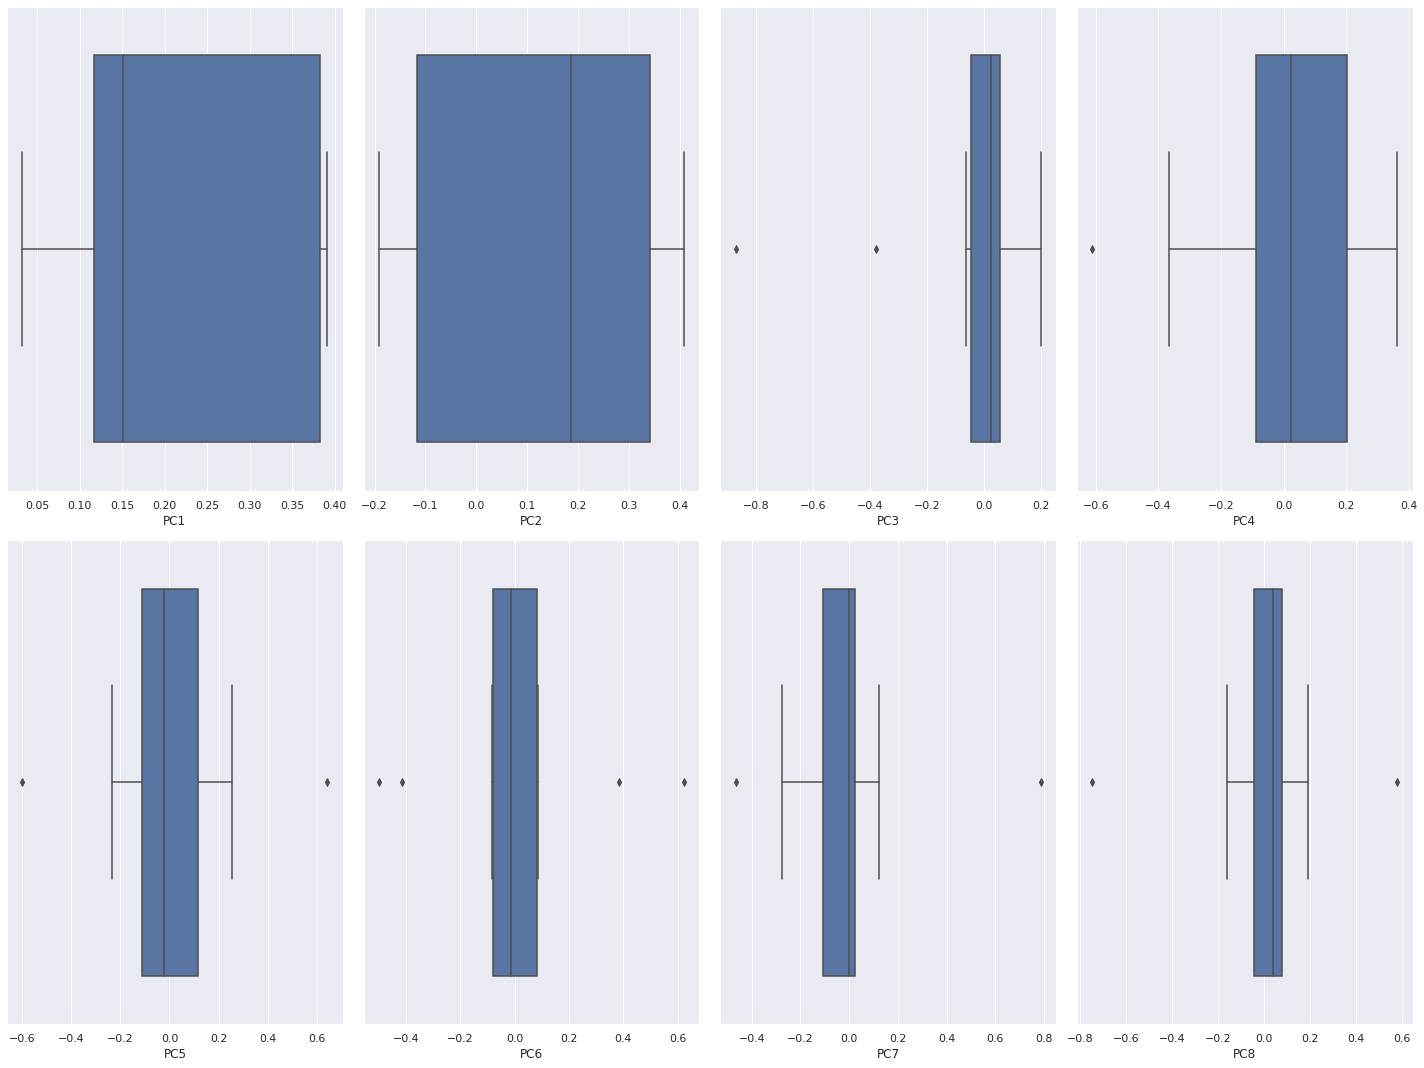

In [28]:
sns.set(rc={'figure.figsize':(20,15)})
fig, ax =plt.subplots(2,4)
j = 0
k = 0
for pc in pcsComponents_df.iloc[:,:8]:
  sns.boxplot(x=pcsComponents_df[pc],ax=ax[k,j])
  j = j + 1
  if j > 3:
    k = k + 1
    j = 0
plt.tight_layout()

Donde podemos observar que PC3, PC4, PC5, PC6, PC7 y PC8 tienen valores atípicos

## **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

* **¿Cuál es el número de componentes mínimo y por qué?**

El número de componentes mínimos lo definimos en base a la variabilidad. En este caso elegimos 8 componentes como mínimo ya que era el mínimo necesario para cubrir un 90% de la variabilidad. Bien podríamos decidirnos por un valor de variabilidad menor y así disminuir los componentes. Sin embargo, eso nos haría perder un porcentaje mayor de variabilidad. Por en esta ocasión se tomó esa decisión de utilizar 8 componentes principales. 

* **¿Cuál es la variación de los datos que representan esos componentes?**

Representan un 91.9% de la variación. Un valor arriba del 90% que se considera bastante valido para la parte de modelación. 

* **¿Cuál es la pérdida de información después de realizar PCA?**

Existe una pérdida de variación del 8.1%

* **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Dependiendo del componente principal, son las variables originales que mayor importancia tienen sobre cada uno. Pero si calculamos la covariancia de cada variable respecto a las demás, y sacamos el porcentaje de cada una sobre el total de variancia, obtenemos que la de mayor importancia es BILL_5 con un 72.24%, y la de menor importancia es BILL_1 con 0.22%

* **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Este método se recomienda usarse cuando hay una gran correlación entre las variables. Si su correlación es baja, entonces no es recomendable usarse. De igual manera solo se recomienda usarse para variables continuas. Si hay variables categoricas no se recomienda.

El método de PCA se utiliza para reducir la dimensionalidad de un set de datos. Nos ayuda a mejorar el rendimiento de los modelos en machine learning sin una gran pérdida de variación de los datos.

 